In [4]:
# pip install yfinance

In [6]:
import yfinance as yf

In [7]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-20, end.month, end.day)

In [91]:
stock = "GOOG"
google_data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [9]:
google_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-10-18,3.566631,3.716071,3.517067,3.715075,3.705974,282061287
2004-10-19,3.748450,3.795773,3.669994,3.684689,3.675662,363918964
2004-10-20,3.686930,3.710841,3.476967,3.499134,3.490562,456613107
2004-10-21,3.596519,3.739234,3.527279,3.720554,3.711439,585767401
2004-10-22,4.247579,4.487430,4.086682,4.294653,4.284132,1481207196


In [10]:
google_data.shape

(5035, 6)

In [93]:
google_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5035.000000,5035.000000,5035.000000,5035.000000,5035.000000,5.035000e+03
mean,46.914944,47.408070,46.445761,46.933753,46.823503,1.136313e+08
std,44.855042,45.345777,44.414134,44.880900,44.783824,1.488920e+08
min,3.566631,3.710841,3.476967,3.499134,3.490562,1.584340e+05
25%,13.180098,13.325677,13.049462,13.184457,13.152158,2.684900e+07
50%,27.592575,27.773746,27.275116,27.569662,27.502121,5.308624e+07
75%,61.824249,62.315250,61.283150,61.849501,61.697983,1.381037e+08
max,191.750000,193.309998,190.619995,192.660004,192.406723,1.650833e+09


In [95]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5035 entries, 2004-10-18 to 2024-10-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5035 non-null   float64
 1   High       5035 non-null   float64
 2   Low        5035 non-null   float64
 3   Close      5035 non-null   float64
 4   Adj Close  5035 non-null   float64
 5   Volume     5035 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 275.4 KB


In [97]:
google_data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [99]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Closing price of Google data')

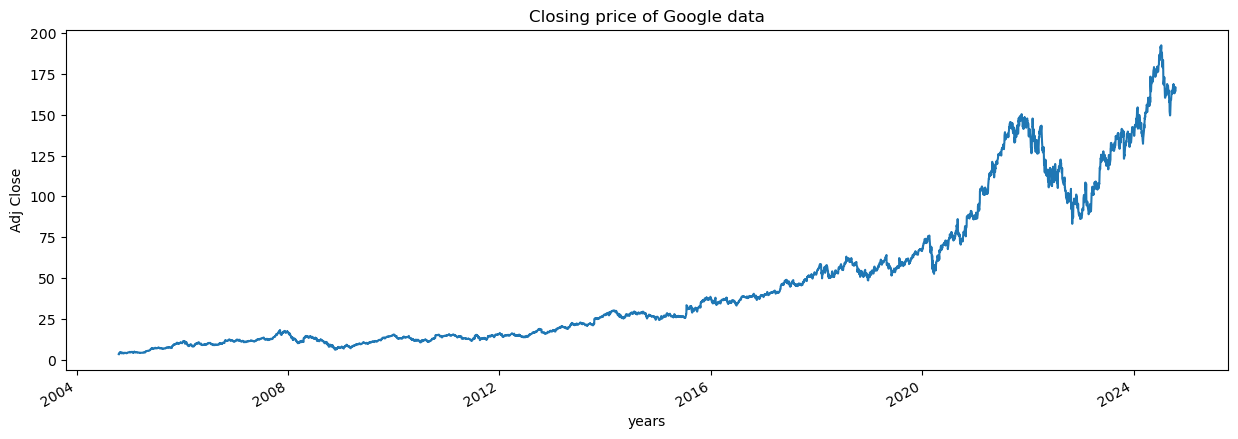

In [101]:
plt.figure(figsize = (15,5))
google_data['Adj Close'].plot()
plt.xlabel("years")
plt.ylabel("Adj Close")
plt.title("Closing price of Google data")

In [102]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google data")
    

In [104]:
google_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

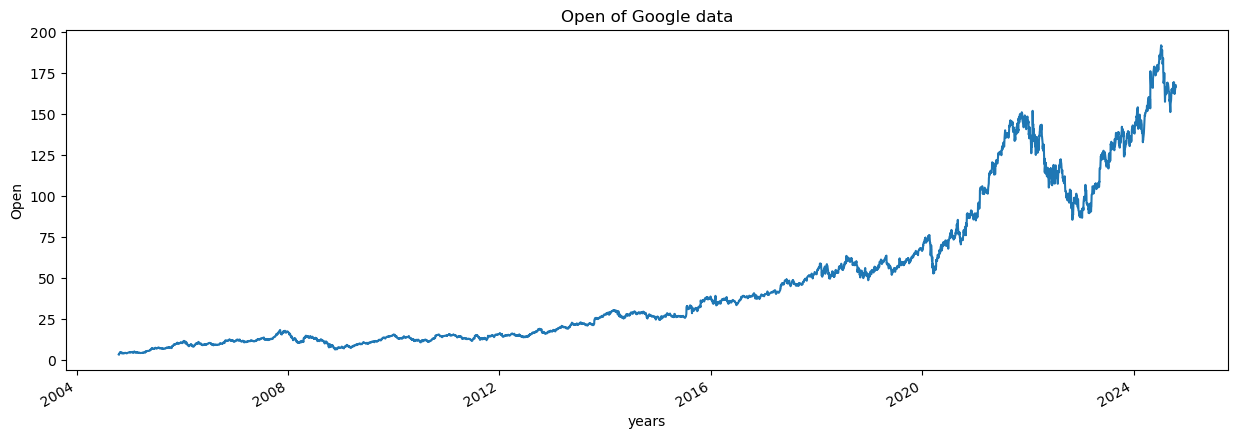

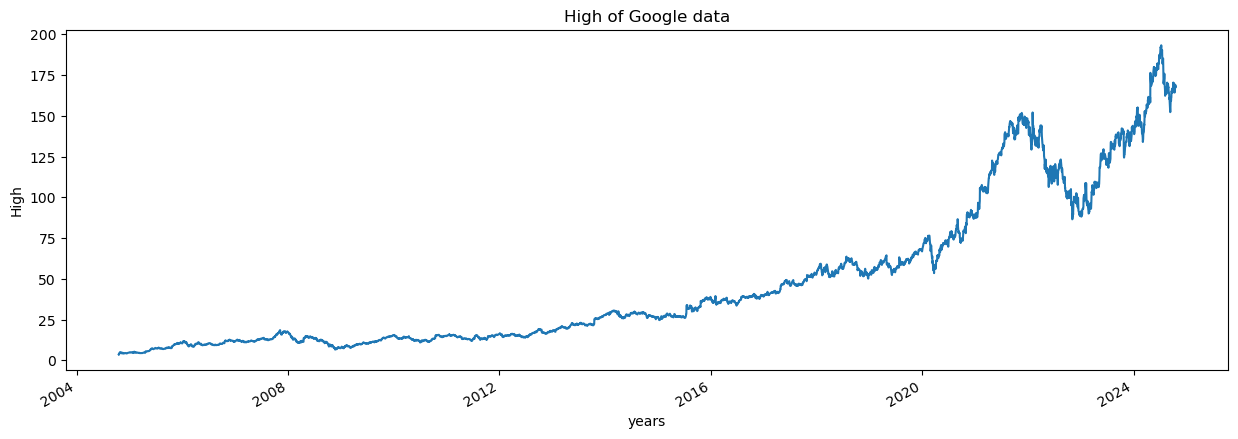

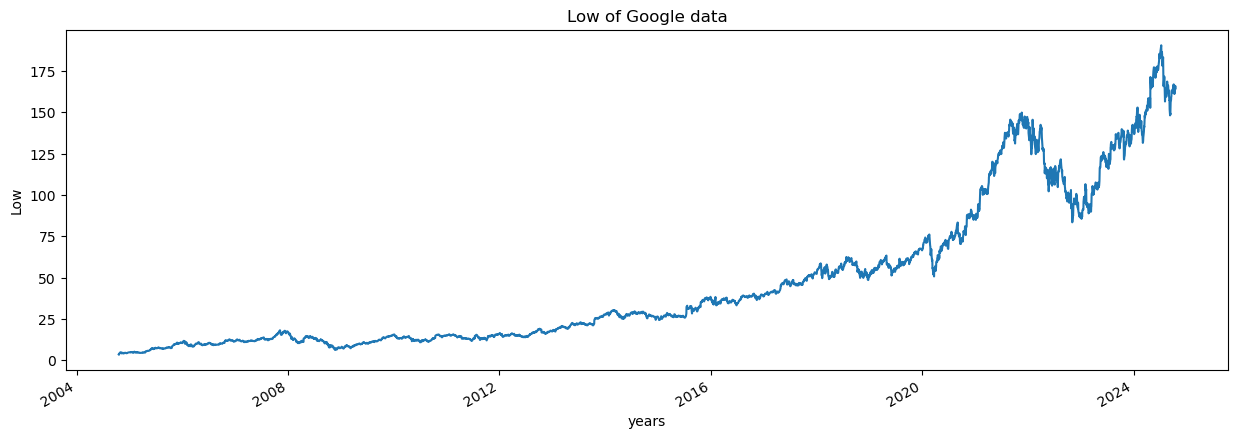

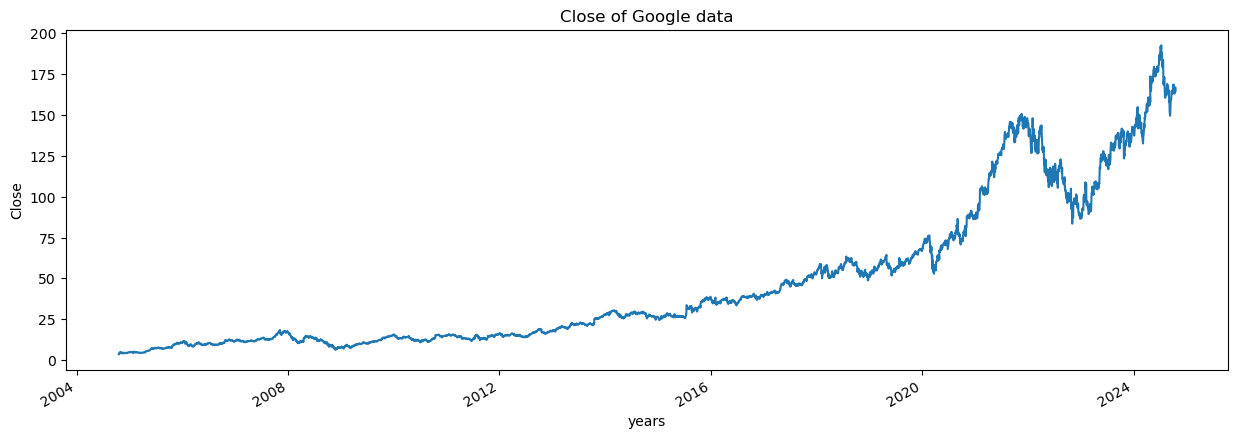

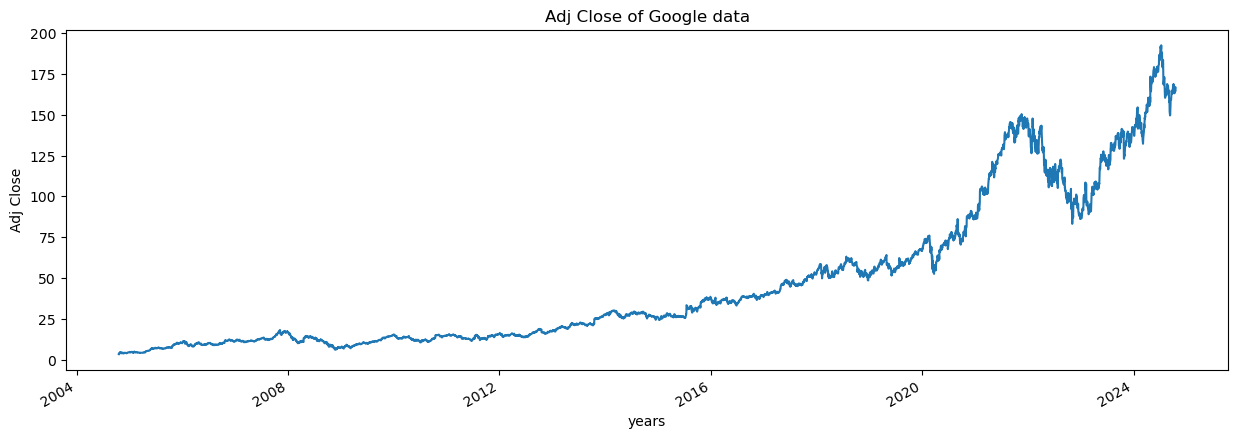

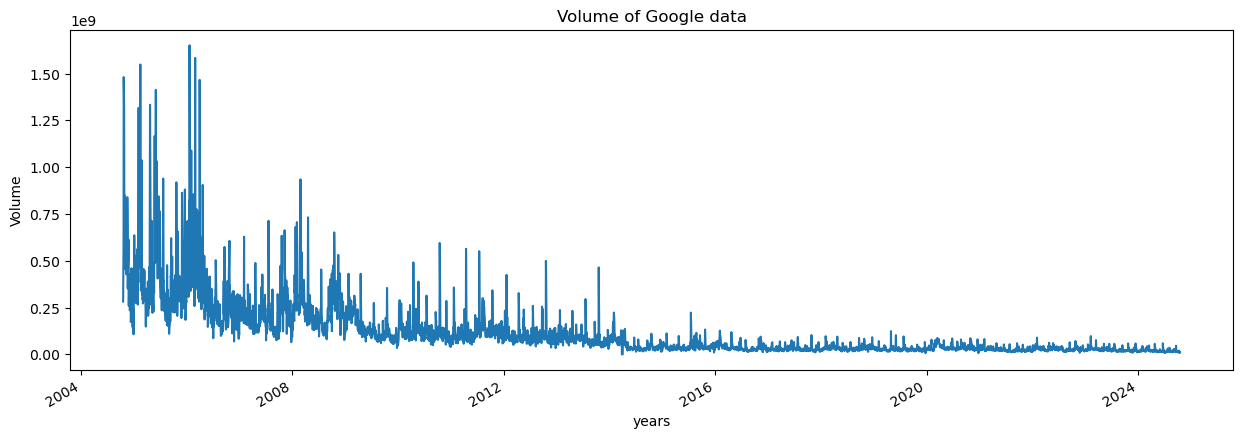

In [107]:
for column in google_data.columns:
    plot_graph((15,5),google_data[column], column)

In [108]:
# 10, 20, 30, 40, 50, 60, 70, 80, 90, 100

# MA for 5 days ==> null null null null 30 40 50 60 70 80

In [109]:
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_data[1:6])/5)

40.0


In [110]:
import pandas as pd
data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [111]:
data['MA'] = data.rolling(5).mean()
data

,0,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [112]:
for i in range(2004,2025):
    print(i,list(google_data.index.year).count(i))

2004 53
2005 252
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 201


In [113]:
google_data['MA_for_250_days'] = google_data['Adj Close'].rolling(250).mean()

In [114]:
google_data['MA_for_250_days'][0:250].tail()

Date
2005-10-06         NaN
2005-10-07         NaN
2005-10-10         NaN
2005-10-11         NaN
2005-10-12    5.759443
Name: MA_for_250_days, dtype: float64

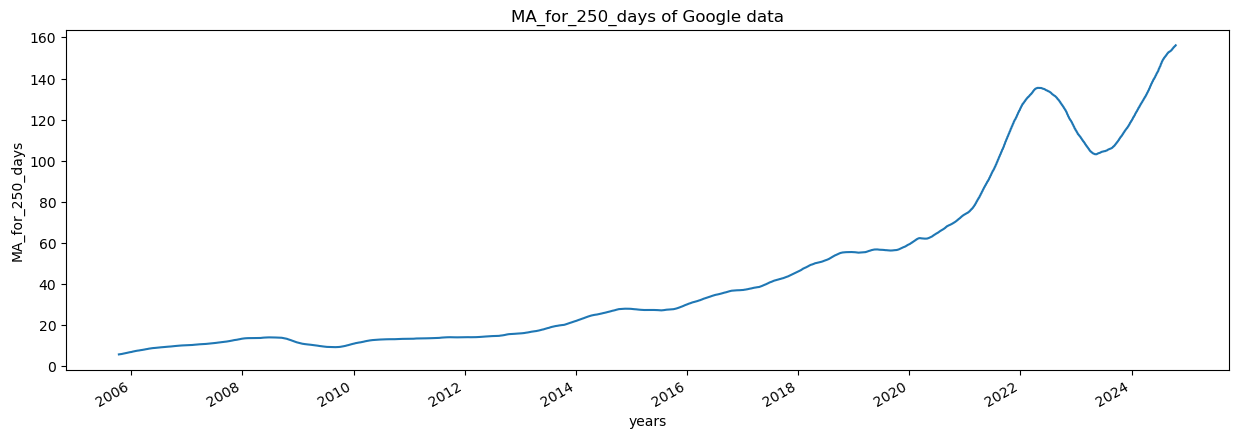

In [115]:
plot_graph((15,5), google_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

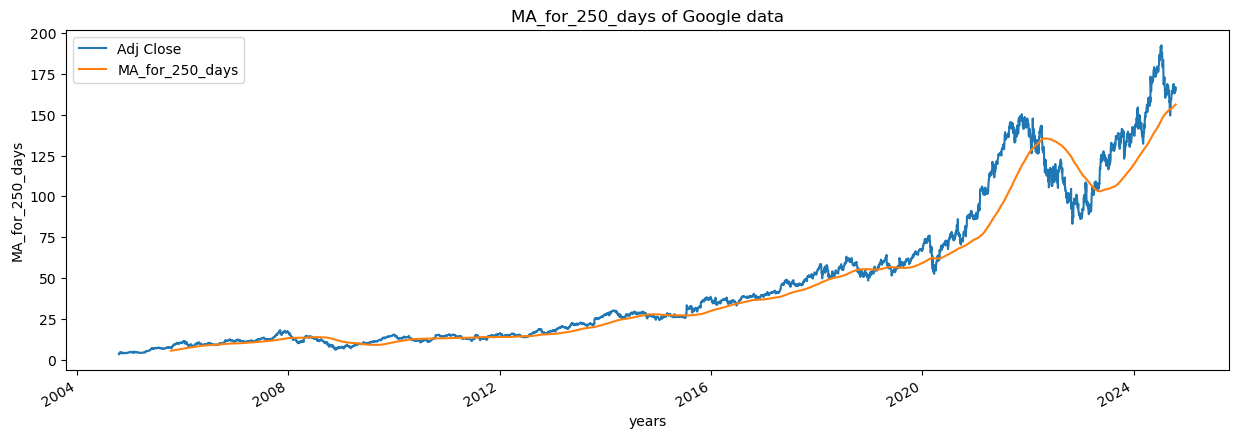

In [116]:
plot_graph((15,5), google_data[['Adj Close','MA_for_250_days']], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

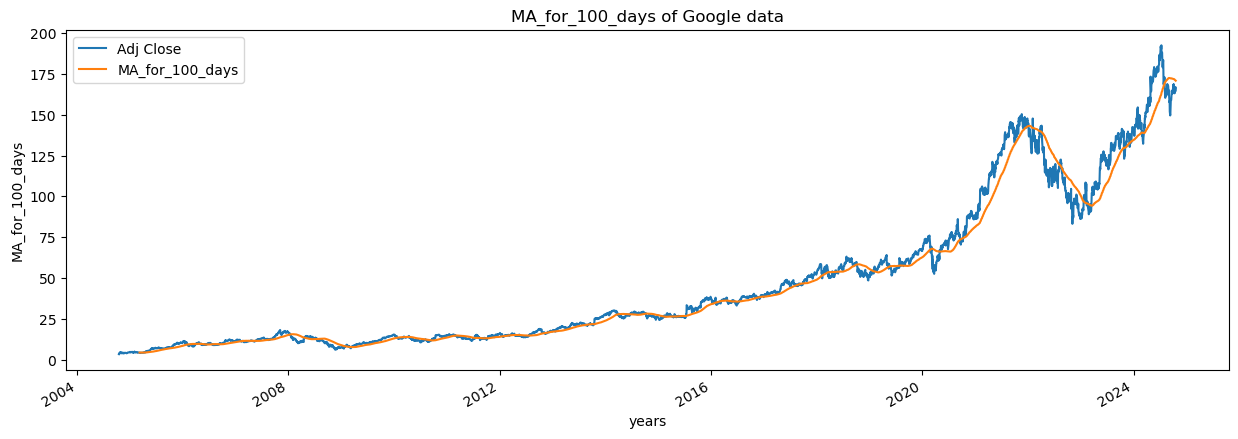

In [118]:
google_data['MA_for_100_days'] = google_data['Adj Close'].rolling(100).mean()
plot_graph((15,5), google_data[['Adj Close','MA_for_100_days']], 'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

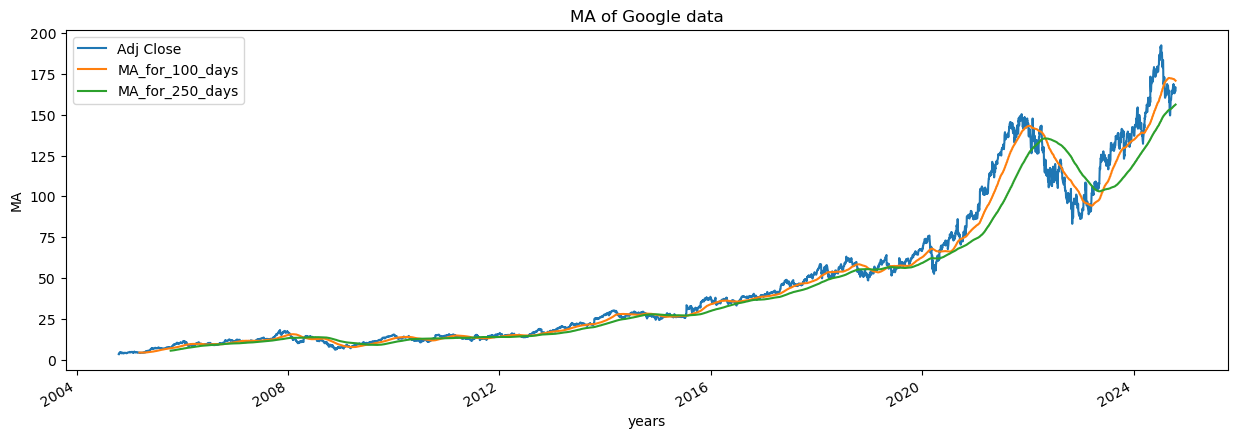

In [126]:
plot_graph((15,5), google_data[['Adj Close','MA_for_100_days', 'MA_for_250_days']], 'MA')

In [128]:
google_data['percentage_change_cp'] = google_data['Adj Close'].pct_change()
google_data[['Adj Close','percentage_change_cp']].head()

,Adj Close,percentage_change_cp
Date,,
2004-10-18,3.705974,NaN
2004-10-19,3.675662,-0.008179
2004-10-20,3.490562,-0.050358
2004-10-21,3.711439,0.063278
2004-10-22,4.284132,0.154305


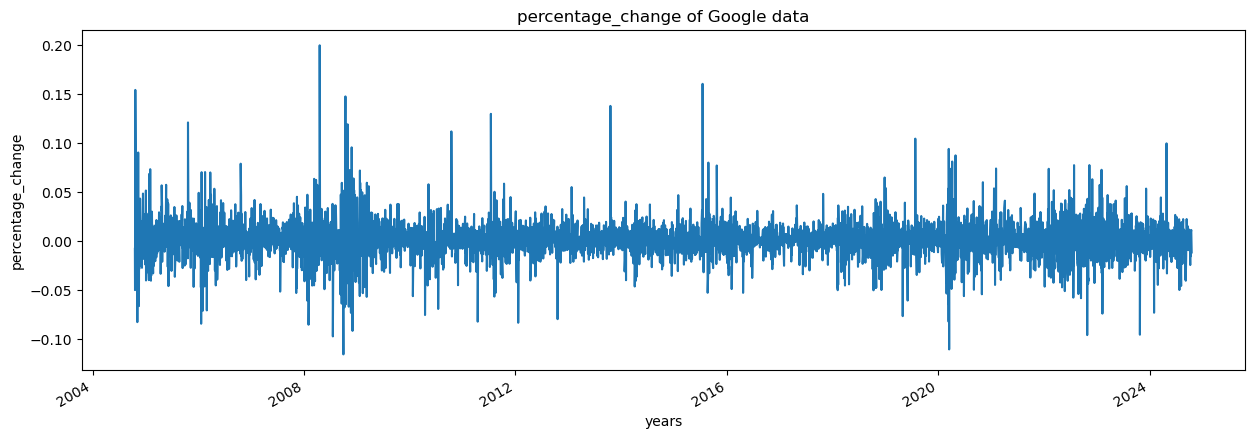

In [130]:
plot_graph((15,5), google_data['percentage_change_cp'], 'percentage_change')

In [132]:
Adj_close_price = google_data[['Adj Close']]

In [133]:
max(Adj_close_price.values),min(Adj_close_price.values) 

(array([192.40672302]), array([3.49056196]))

In [136]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[0.00114025],
       [0.0009798 ],
       [0.        ],
       ...,
       [0.86498387],
       [0.86413699],
       [0.8536561 ]])

In [141]:
len(scaled_data)

5035

In [143]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])
    
import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [145]:
x_data[0],y_data[0]

(array([[0.00114025],
        [0.0009798 ],
        [0.        ],
        [0.00116918],
        [0.00420065],
        [0.00616945],
        [0.00543295],
        [0.00598138],
        [0.0069454 ],
        [0.00659556],
        [0.00730443],
        [0.00715188],
        [0.00673102],
        [0.00581435],
        [0.00379557],
        [0.00421642],
        [0.00371009],
        [0.00359961],
        [0.00559341],
        [0.00545926],
        [0.00583671],
        [0.00421511],
        [0.00420985],
        [0.00355753],
        [0.00380215],
        [0.00323663],
        [0.0035549 ],
        [0.00450708],
        [0.005116  ],
        [0.00533432],
        [0.00545663],
        [0.00519097],
        [0.00511732],
        [0.00524883],
        [0.00470829],
        [0.00406913],
        [0.00387843],
        [0.00433216],
        [0.00409806],
        [0.00394024],
        [0.00502394],
        [0.00516729],
        [0.00473197],
        [0.00520674],
        [0.00585644],
        [0

In [147]:

int(len(x_data)*0.7)

3454

In [149]:
4908-100-int(len(x_data)*0.7)

1354

In [151]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [153]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3454, 100, 1)
(3454, 1)
(1481, 100, 1)
(1481, 1)


In [160]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [161]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

D:\python\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [164]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [166]:
model.fit(x_train, y_train, batch_size=1, epochs = 2)

Epoch 1/2
3454/3454 ━━━━━━━━━━━━━━━━━━━━ 81s 22ms/step - loss: 2.5095e-04
Epoch 2/2
3454/3454 ━━━━━━━━━━━━━━━━━━━━ 75s 22ms/step - loss: 4.4231e-05


In [167]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [170]:
predictions = model.predict(x_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step


In [171]:
predictions

array([[0.2845696 ],
       [0.29013297],
       [0.29443046],
       ...,
       [0.87870336],
       [0.8843407 ],
       [0.8865336 ]], dtype=float32)

In [174]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 57.25036 ],
       [ 58.30137 ],
       [ 59.113235],
       ...,
       [169.49182 ],
       [170.55681 ],
       [170.97108 ]], dtype=float32)

In [176]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 54.17844772],
       [ 54.28169632],
       [ 54.58744431],
       ...,
       [166.8999939 ],
       [166.74000549],
       [164.75999451]])

In [178]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))

In [180]:
rmse

7.004905163304566

In [182]:
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = google_data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2018-11-28,54.178448,57.250359
2018-11-29,54.281696,58.301369
2018-11-30,54.587444,59.113235
2018-12-03,55.185970,59.641056
2018-12-04,52.412285,60.113628


<Figure size 640x480 with 0 Axes>

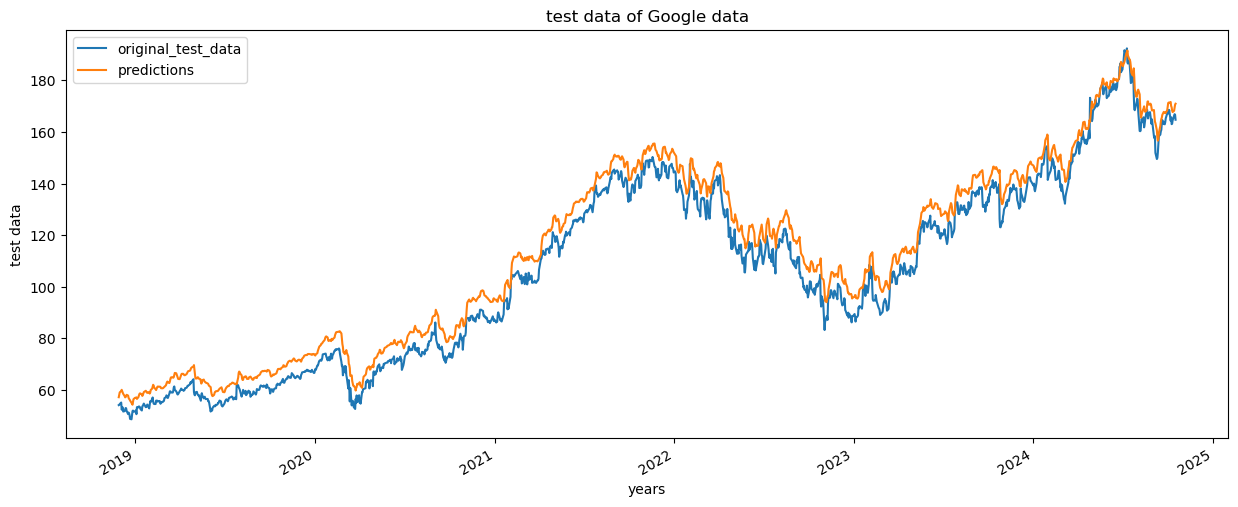

In [184]:
plot_graph((15,6), ploting_data, 'test data')

<Figure size 640x480 with 0 Axes>

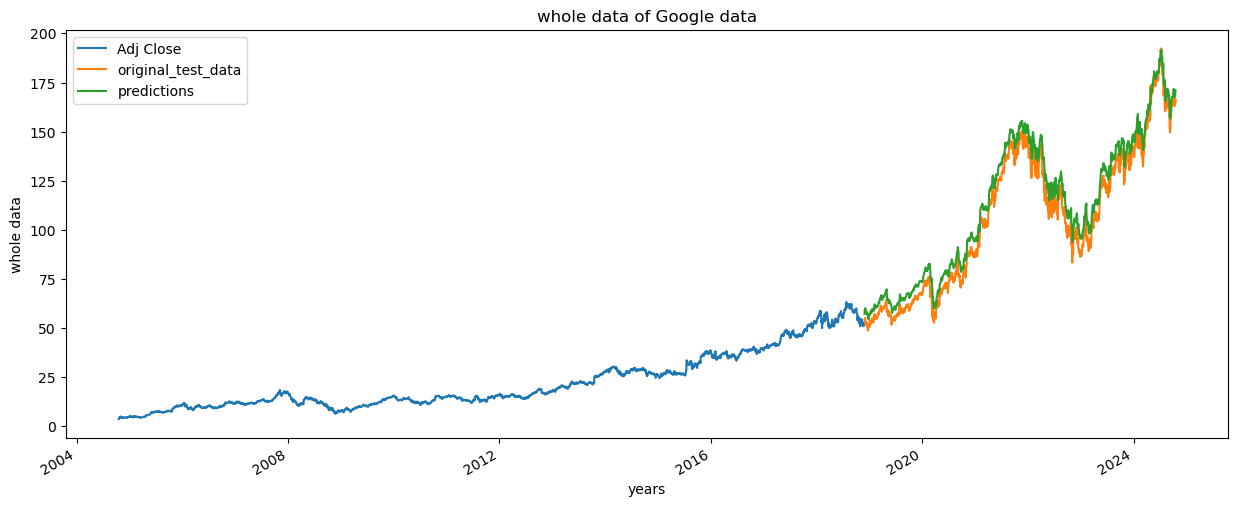

In [186]:
plot_graph((15,6), pd.concat([Adj_close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

In [189]:
model.save("Latest_stock_price_model.keras")